In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
def logsense(m,m0,mr):
    return 1.0/(1.0 + (m/m0)**(-1.0/mr))

def con_plot(name, style, label, n=20, ax = plt):
    m = np.logspace(-4,7,n)
    f = np.power(10, np.loadtxt(name))
    m = m[~np.isnan(f)]
    f = f[~np.isnan(f)]
    #print(m,f)
    
    print(label)
    ax.loglog(m,f/logsense(m,1e-2,0.5), style, label = label)

#for now, assume a DM-star mass ratio of 100:1, to get dual axes when comparing to fraction of baryonic stars, and fraction of DM
DM_star_ratio = 100

filetype = 'pdf'

1% baryon error
5% baryon error
20% baryon error
50% baryon error
100% baryon error


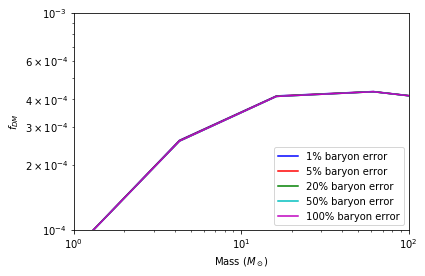

In [50]:
con_plot('n_100_error_0.01.txt', 'b-', '1% baryon error')
con_plot('n_100_error_0.05.txt', 'r-', '5% baryon error')
con_plot('n_100_error_0.2.txt', 'g-', '20% baryon error')
con_plot('n_100_error_0.2.txt', 'c-', '50% baryon error')
con_plot('n_100_error_0.2.txt', 'm-', '100% baryon error')
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('$f_{DM}$')
plt.legend()

plt.xlim(1,100)
plt.ylim(1e-4, 1e-3)
plt.show()


Core

LMC

100 LoS



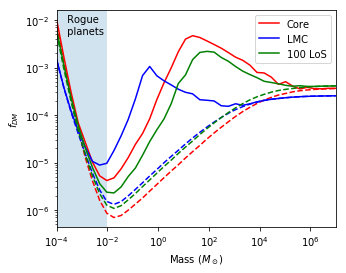

In [4]:
plt.figure(figsize = [5,4])
ax = plt.axes()

con_plot('sbc_core_bar.txt', 'r-', 'Core', n=40)
con_plot('sbc_core_nobar.txt', 'r--', '', n=40)

con_plot('sbc_lmc_bar.txt', 'b-', 'LMC', n=40)
con_plot('sbc_lmc_nobar.txt', 'b--', '', n=40)

con_plot('sbc_n20_bar.txt', 'g-', '100 LoS', n=40)
con_plot('sbc_n20_nobar.txt', 'g--', '', n=40)

rect = Rectangle((1e-5,4e-7), (1e-2-1e-5), 1, alpha=0.2)
ax.add_patch(rect)
plt.text(2e-4,5e-3, ' Rogue \n planets')


plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('$f_{DM}$')
plt.xlim(1e-4,1e7)
plt.legend()
plt.savefig('./figures/core_baryons_compare.{}'.format(filetype))
plt.show()

No survey time
One year
Twelve years


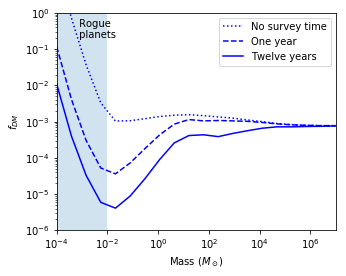

In [9]:
plt.figure(figsize = [5,4])
ax = plt.axes()

con_plot('time_notime.txt', 'b:', 'No survey time')
con_plot('time_1yr.txt', 'b--', 'One year')
con_plot('time_fulltime.txt', 'b-', 'Twelve years')

rect = Rectangle((1e-5,4e-7), (1e-2-1e-5), 1, alpha=0.2)
ax.add_patch(rect)
plt.text(6e-4,2e-1, ' Rogue \n planets')

plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('$f_{DM}$')
plt.xlim(1e-4,1e7)
plt.ylim(1e-6,1)

plt.legend()
plt.savefig('./figures/runtime.{}'.format(filetype))
plt.show()

['sphericality_0.01.txt' 'sphericality_0.06.txt' 'sphericality_0.11.txt'
 'sphericality_0.16.txt' 'sphericality_0.21.txt' 'sphericality_0.26.txt'
 'sphericality_0.305.txt' 'sphericality_0.355.txt'
 'sphericality_0.405.txt' 'sphericality_0.455.txt'
 'sphericality_0.505.txt' 'sphericality_0.555.txt'
 'sphericality_0.605.txt' 'sphericality_0.655.txt' 'sphericality_0.7.txt'
 'sphericality_0.75.txt' 'sphericality_0.8.txt' 'sphericality_0.85.txt'
 'sphericality_0.9.txt' 'sphericality_0.95.txt' 'sphericality_1.0.txt']


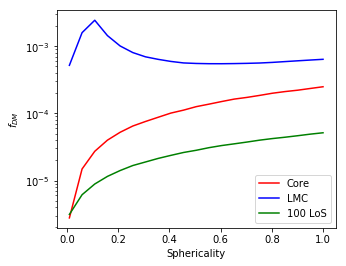

In [8]:
import glob
listing = np.sort(glob.glob("sphericality_*"))

print(listing)

f_array = np.zeros([5,21])

i = 0
for name in listing:
    file = np.loadtxt(name)
    f_array[:,i] = np.power(10,file)
    i = i+1
    
labels = np.array(['Core', 'LMC', '5 LoS', '20 LoS', '100 LoS'])
styles = np.array(['r-', 'b-', 'g-', 'g--', 'g-'])
q = np.linspace(0.01, 1.0, 21)

plt.figure(figsize = [5,4])

for j in np.array([0,1,4]):
    plt.semilogy(q, f_array[j,:], styles[j], label = labels[j])
                   

plt.legend()
plt.ylabel('$f_{DM}$')
plt.xlabel('Sphericality')
plt.savefig('./figures/sphericality.{}'.format(filetype))
                   
plt.show()

1.2218487496163564


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


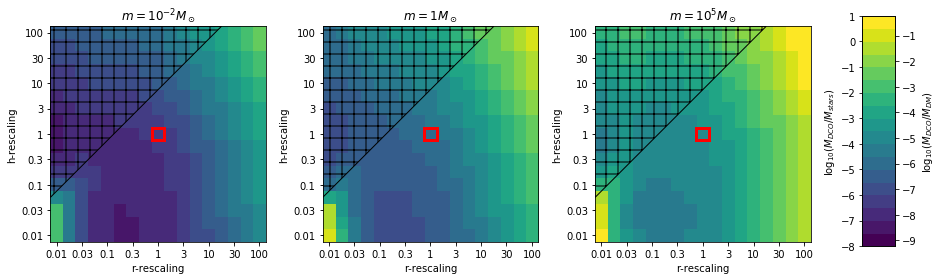

In [28]:
import matplotlib.patches as patches
from matplotlib.colors import Colormap

def DD_grid(m, ax):
    f = np.loadtxt('rescaled_disk_m{}.txt'.format(str(m)))
    Qr = np.logspace(-2,2,num = 17)
    Qz = np.logspace(-2,2,num = 17)
    
    s = 17

    f = np.transpose(f)
    f = np.flip(f, 0)
    #print(qr_matrix)
    #print(qz_matrix)
    #print(fmatrix)

    #fig,(ax1, ax2, ax3) = plt.subplots(1,3)
    #fig,ax = plt.subplots(1)

    cmap = plt.cm.get_cmap('viridis', 18)
    im = ax.imshow(f, cmap = cmap)

    ax.set_ylabel('h-rescaling')
    ax.set_xlabel('r-rescaling')

    ax.set_yticks([0,2,4,6,8,10,12,14,16], ['100', '30', '10', '3', '1', '0.3','0.1', '0.03', '0.01'])
    ax.set_xticks([0,2,4,6,8,10,12,14,16], ['100', '30', '10', '3', '1', '0.3','0.1', '0.03', '0.01'])


    rect = patches.Rectangle((7.5,7.5),1,1,linewidth=3,edgecolor='r',facecolor='none')

    ax.add_patch(rect)
    
    yp = 13
    xp = 13
    points = np.array([[-0.5, -0.5], [-0.5,yp], [xp,-0.5]])
    shade = patches.Polygon(points, fill = False, hatch = '+', )
    
    ax.add_patch(shade)

    
    
    #plt.show()
    return im

fig,(ax1, ax2, ax3) = plt.subplots(1,3, subplot_kw = {'aspect':'equal'})

fig.set_figheight(4)
fig.set_figwidth(15)

im1 = DD_grid(0.01, ax1)
im2 = DD_grid(1.0, ax2)
im3 = DD_grid(100000.0, ax3)

ax1.set_title('$m = 10^{-2} M_\odot$')
ax2.set_title('$m = 1 M_\odot$')
ax3.set_title('$m = 10^{5} M_\odot$')

Qr = np.logspace(-2,2,num = 17)
Qz = np.logspace(-2,2,num = 17)
        

plt.setp((ax1, ax2, ax3), xticks = [0,2,4,6,8,10,12,14,16], xticklabels = ['0.01', '0.03', '0.1','0.3','1','3', '10', '30', '100'], yticks = [0,2,4,6,8,10,12,14,16], yticklabels = ['100', '30', '10', '3','1', '0.3','0.1','0.03', '0.01'])

fig.subplots_adjust(right=1.75)
cbar_ax = fig.add_axes([0.90, 0.13, 0.03, 0.8])
c = fig.colorbar(im3, cax=cbar_ax)

#pos = cbar.ax.get_position()
#ax1 = cbar.ax
cbar_ax.set_aspect('auto')

cfac = np.log10(1/0.06)
print(cfac)

cbar_ax2 = cbar_ax.twinx()
cbar_ax2.set_ylim([-8-cfac, 1-cfac])

im3.set_clim(-8,1)
im2.set_clim(-8,1)
im1.set_clim(-8,1)

cbar_ax.yaxis.set_label_position('left')
cbar_ax.set_ylabel('$\log_{10}(M_{DCO}/M_{stars})$')

cbar_ax2.set_ylabel('$\log_{10}(M_{DCO}/M_{DM})$')

#plt.show()

plt.tight_layout()

plt.savefig('./figures/DD_grid_hatch.{}'.format(filetype))

plt.show()

Rescaled by 100.0
Rescaled by 10.0
Rescaled by 1.0
Rescaled by 0.1
Rescaled by 0.01
16.666666666666668


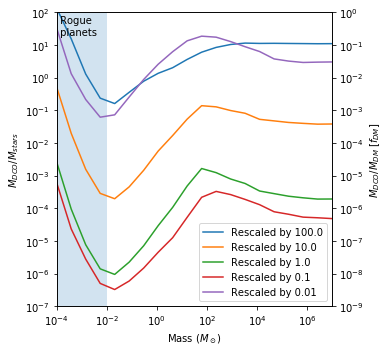

In [18]:
qlist = np.array([0.01, 0.1, 1, 10, 100])

fig, ax1 = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(5.5)
#plt.figure(figsize = [5,4])
ax2 = ax1.twinx()

for q in np.flip(qlist):
    name = 'rescaled_DD_mass_q{}.txt'.format(str(q))
    
    con_plot(name, '', 'Rescaled by {}'.format(str(q)), ax = ax1)
    
    
DM_star_ratio = 1/0.06
print(DM_star_ratio)
ax1.set_xlim(1e-4, 1e7)
ax1.set_ylim(1e-7, DM_star_ratio)

ax2.loglog()
ax2.set_ylim(1e-7/DM_star_ratio, 1)
ax1.set_xlabel('Mass ($M_\odot$)')
ax1.set_ylabel('$M_{DCO}/M_{stars}$')
ax2.set_ylabel('$M_{DCO}/M_{DM} \; [f_{DM}$]')

rect = Rectangle((1e-5,1e-7), (1e-2-1e-5), 1e2, alpha=0.2)
ax1.add_patch(rect)
plt.text(1e-4,2e-1, ' Rogue \n planets')


ax2.set_yticks(np.power(10.0, np.arange(-9, 1)), minor=False)
ax1.set_yticks(np.power(10.0, np.arange(-7, 3)), minor=False)
plt.minorticks_off()
ax1.legend()
plt.tight_layout()
plt.savefig('./figures/darkdisk_massconstraints.{}'.format(filetype))
plt.show()




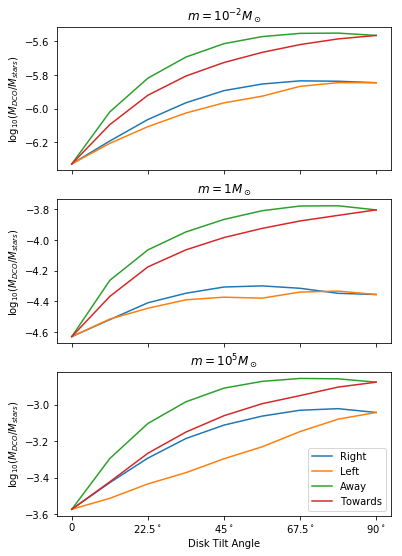

In [9]:
#tilted disk

def tiltdiskplot(m, ax):
    con = np.loadtxt('result_array_tiltdisk_{}.txt'.format(str(m)))
    
    phi = np.linspace(0, np.pi/2, 9)
    
    ax.plot(phi, con[:,0], label = 'Right')
    ax.plot(phi, con[:,2], label = 'Left')
    
    ax.plot(phi, con[:,1], label = 'Away')
    ax.plot(phi, con[:,3], label = 'Towards')
    
    ax.set_ylabel('$\log_{10}(M_{DCO}/M_{stars})$')
    #ax.legend()
   
    #print(con)
 

fig,(ax1, ax2, ax3) = plt.subplots(3,1, sharex = True)

fig.set_figheight(9)
fig.set_figwidth(6)


tiltdiskplot(0.01, ax1)
tiltdiskplot(1.0, ax2)
tiltdiskplot(100000.0, ax3)

ax1.set_title('$m = 10^{-2} M_\odot$')
ax2.set_title('$m = 1 M_\odot$')
ax3.set_title('$m = 10^{5} M_\odot$')


xmarks = np.linspace(0,np.pi/2,5)
plt.xticks(xmarks, ['0', '$22.5^\circ$', '$45^\circ$', '$67.5^\circ$', '$90^\circ$',])
plt.legend()
ax3.set_xlabel('Disk Tilt Angle')
    
plt.savefig('./figures/tiltdisk.{}'.format(filetype))
plt.show()

[-3.60318945 -3.19433198 -3.45432792 -3.66429973 -3.98536158 -4.19641592
 -4.28888472 -4.34873863 -4.53461752 -4.61269236 -4.67729847 -3.71998268
 -3.85375299 -4.15537312 -4.14552346 -4.40186229 -4.39014117 -4.54796593
 -4.56955052 -4.70265192 -3.20487387 -3.34513488 -3.99199974 -4.12838541
 -3.96548286 -4.31840821 -4.41259071 -4.43583081 -4.54583453]


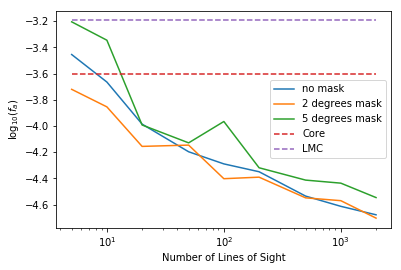

In [14]:
f = np.loadtxt('n_LoS_mNFW.txt')

print(f)
#f = np.power(10,f)
#print(f)
f_core = f[0]
f_lmc = f[1]
f_los = f[2:11]
f_los_m2 = f[11:20]
f_los_m5 = f[20:29]

N = np.array([5, 10, 20, 50, 100, 200, 500, 1000, 2000])

plt.plot(N, f_los, label = 'no mask')
plt.plot(N, f_los_m2, label = '2 degrees mask')
plt.plot(N, f_los_m5, label = '5 degrees mask')
plt.plot([5,2000],[f_core, f_core], '--', label = 'Core')
plt.plot([5,2000],[f_lmc, f_lmc], '--', label = 'LMC')

plt.legend()
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of Lines of Sight')
plt.ylabel('$\log_{10}(f_a)$')

plt.savefig('./figures/linesofsight.{}'.format(filetype))
plt.show()